In [1]:
# # from find_probabilistic_clusters import *
# import pickle


# from os.path import isfile, join
# import plotly.graph_objects as go

# import networkx as nx
# from os import listdir
# from os.path import isfile, join
# import matplotlib.pyplot as plt

# import plotly.graph_objects as go
# import numpy as np
# from os import *
# from os.path import isfile, join
# import pandas as pd

# import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# import plotly.express as px

In [1]:
import pickle
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import scipy.interpolate
import matplotlib.ticker as ticker
import numpy as np

In [2]:
types = ['dotsim_dotsim', 'jaccard_jaccard']
# types = ['dotsim_dotsim']

networks = ['harveyaug17','harveyaug18','harveysept02', 
            'harveysept12','harveysept13','harveysept14', 
            'harveysept16','harveysept17','harveysept18',
            'harveysept22','harveysept23','harveysept25']

# networks=['bible', 'ca-GrQc', 'email-Eu-core', 'euroroad', 'facebook_NIPS', 'facebook_social_circles', 
#           'friendships-hamster', 'hamster', 'human_protein', 'powergrid', 'protein', 'twitch_ES', 'twitch_PTBR', 'twitch_RU', 'virgili']

# networks=['harveyaug17','harveyaug18','harveysept02', 
#           'harveysept12','harveysept13','harveysept14', 
#           'harveysept16','harveysept17','harveysept18',
#           'harveysept22','harveysept23','harveysept25',
#           'bible', 'ca-GrQc', 'email-Eu-core', 'euroroad', 
#           'facebook_NIPS', 'facebook_social_circles', 
#           'friendships-hamster', 'hamster', 'human_protein', 
#           'powergrid', 'protein', 'twitch_ES', 
#           'twitch_PTBR', 'twitch_RU', 'virgili']

# path = 'runs_wheeler/save_scores/'
path = 'save_scores/'

In [4]:
scores_files = []
score_types = []
network_list = []
for sim_type in types:
    for network in networks:
        scores_path = path + sim_type + '/' + network + '/'
        for file in listdir(scores_path):
            if isfile(join(scores_path, file)):
                scores_files.append(sim_type + '/' + network + '/' + file)
                score_types.append(sim_type)
                network_list.append(network)
                
all_scores = []

for file in scores_files:
    
    similairty = file.split('/')[0]
    network = file.split('/')[1]

    # load pickle with scores
    infile = open(path + file,'rb')
    scores = pickle.load(infile)
    infile.close()
    
    v = list(scores.values())
    t = (similairty,network, v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8])
    all_scores.append(t)

columns = ['similarity','network'] + list(scores.keys())
df = pd.DataFrame(all_scores,columns = columns)

df = df.rename(columns={'t1': 'epsilon C', 't2': 'epsilon M', 'newman_modularity': 'modularity'})

df['t1'] = pd.to_numeric(df['epsilon C'], downcast="float")
df['t2'] = pd.to_numeric(df['epsilon M'], downcast="float")
df = df.sort_values(by=['epsilon C','epsilon M'])

df = df.loc[df['modularity'] > 0.0]
df = df.sort_values(by='modularity', ascending=False)

df = df.loc[df['conductance'] > 0.0]
df = df.loc[df['conductance'] < 1.0]

df = df.sort_values(by='modularity', ascending=False)
df = df.drop(columns=['clusters_found', 'clusters_merged', 'remaining_clusters', 't1', 't2'])
df.to_csv('other networks_harvey_all_scores_probabilistic.csv', index=False)
df.head(10)
# df.sort_values(by='conductance', ascending=True)
# df.sort_values(by='newman_modularity', ascending=False)
# df.head(50)

,similarity,network,epsilon C,epsilon M,modularity,conductance,internal_edge_density,cut_ratio
1219,jaccard_jaccard,harveysept22,0.1,0.5,0.559265,0.410174,0.149358,0.025388
1231,jaccard_jaccard,harveysept22,0.1,0.9,0.559265,0.410174,0.149358,0.025388
1225,jaccard_jaccard,harveysept22,0.1,0.7,0.559265,0.410174,0.149358,0.025388
1222,jaccard_jaccard,harveysept22,0.1,0.6,0.559265,0.410174,0.149358,0.025388
1232,jaccard_jaccard,harveysept22,0.1,0.8,0.559265,0.410174,0.149358,0.025388
759,dotsim_dotsim,harveysept22,0.1,0.9,0.554571,0.406920,0.141061,0.023980
777,dotsim_dotsim,harveysept22,0.3,0.8,0.505168,0.689814,0.199429,0.014555
609,dotsim_dotsim,harveysept17,0.2,0.8,0.499783,0.529073,0.173928,0.023450
1023,jaccard_jaccard,harveysept12,0.2,0.8,0.497208,0.622766,0.203700,0.023989
1018,jaccard_jaccard,harveysept12,0.2,0.4,0.497208,0.622766,0.203700,0.023989


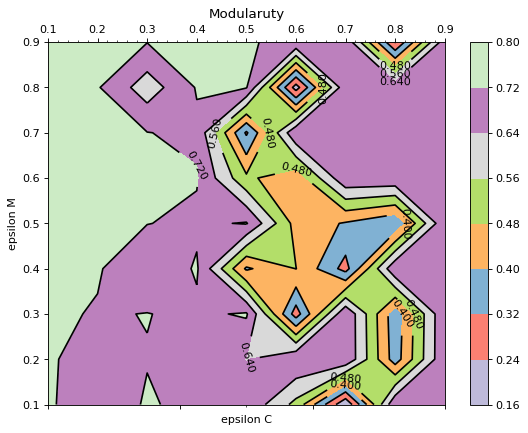

In [60]:
# cmapName = 'Spectral'
cmapName = 'Set3'

# 2D-arrays from DataFrame
x1 = np.linspace(df['epsilon C'].min(), df['epsilon C'].max(), len(df['epsilon C'].unique()))
y1 = np.linspace(df['epsilon M'].min(), df['epsilon M'].max(), len(df['epsilon M'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

X, Y = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
Z1 = scipy.interpolate.griddata((df['epsilon C'], df['epsilon M']), df['modularity'], (X, Y), method='cubic')

# cp = plt.contourf(X, Y, Z1, cmap='plasma')
# plt.colorbar(cp);

# using the variable ax for single a Axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

cp = plt.contourf(X, Y, Z1,cmap=cmapName)
plt.colorbar(cp)
cp = ax.contour(X, Y, Z1,colors='black',  vmin = 0, vmax =1)
ax.clabel(cp, inline=True, fontsize=10)
#ax[0].yaxis.tick_left()

ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=4))
ax.xaxis.set_minor_locator(ticker.LinearLocator(numticks=3))


# ax.get_yaxis().set_major_locator(tiker.LinearLocator(numticks=4))
# ax.get_xaxis().set_major_locator(tiker.LinearLocator(numticks=3))

secax = ax.secondary_xaxis('top')
secax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
# secax = ax.secondary_yaxis('right')
secax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.set_title('Modularuty')
ax.set_xlabel('epsilon C')
ax.set_ylabel('epsilon M')
plt.tick_params(labelbottom=False)
plt.clim(0, 0.9) 

In [132]:
df.loc[df['epsilon C'] < 0.3]

,similarity,network,epsilon C,epsilon M,modularity,conductance,internal_edge_density,cut_ratio
146,dotsim_dotsim,harveyaug18,0.2,0.1,-0.000316,0.3,0.023193,0.003351
113,dotsim_dotsim,harveyaug18,0.2,0.3,-0.000316,0.3,0.023193,0.003351
94,dotsim_dotsim,harveyaug18,0.2,0.5,-0.000316,0.3,0.023193,0.003351
154,dotsim_dotsim,harveyaug18,0.2,0.4,-0.000316,0.3,0.023193,0.003351
106,dotsim_dotsim,harveyaug18,0.2,0.6,-0.000316,0.3,0.023193,0.003351
...,...,...,...,...,...,...,...,...
1237,jaccard_jaccard,harveysept22,0.2,0.3,0.095097,0.3,0.197598,0.025312
967,jaccard_jaccard,harveyaug17,0.2,0.1,0.006578,0.3,0.206291,0.016627
1213,jaccard_jaccard,harveysept22,0.2,0.1,0.007782,0.3,0.194396,0.017016
996,jaccard_jaccard,harveyaug18,0.2,0.1,0.005728,0.3,0.210791,0.016863


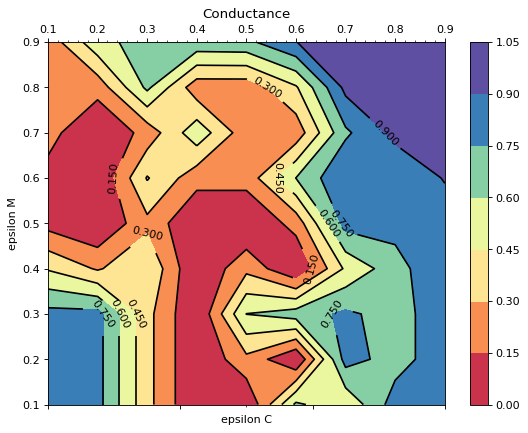

In [148]:
cmapName = 'Spectral'

# 2D-arrays from DataFrame
x1 = np.linspace(df['epsilon C'].min(), df['epsilon C'].max(), len(df['epsilon C'].unique()))
y1 = np.linspace(df['epsilon M'].min(), df['epsilon M'].max(), len(df['epsilon M'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

X, Y = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
Z1 = scipy.interpolate.griddata((df['epsilon C'], df['epsilon M']), df['conductance'], (X, Y), method='cubic')

# cp = plt.contourf(X, Y, Z1, cmap='plasma')
# plt.colorbar(cp);

# using the variable ax for single a Axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

cp = plt.contourf(X, Y, Z1,cmap=cmapName)
plt.colorbar(cp)
cp = ax.contour(X, Y, Z1,colors='black',  vmin = 0, vmax =1)
ax.clabel(cp, inline=True, fontsize=10)
#ax[0].yaxis.tick_left()

ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=4))
ax.xaxis.set_minor_locator(ticker.LinearLocator(numticks=3))


# ax.get_yaxis().set_major_locator(tiker.LinearLocator(numticks=4))
# ax.get_xaxis().set_major_locator(tiker.LinearLocator(numticks=3))

secax = ax.secondary_xaxis('top')
secax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
# secax = ax.secondary_yaxis('right')
secax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.set_title('Conductance')
ax.set_xlabel('epsilon C')
ax.set_ylabel('epsilon M')
plt.tick_params(labelbottom=False)
plt.clim(0, 0.9) 